# **IN-VEHICLE COUPON RECOMMENDATION**

---





*  NAME: GAYATHRI GIRISH
*  ORGANISATION: ENTRI ELEVATE
*  DATE:

---






**1.OVERVIEW OF THE PROBLEM:**

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and asks the person whether they will accept the coupon if they are the driver. The objective is to develop an effective prediction model to determine whether a driver will accept a coupon based on the provided scenario.

**2.OBJECTIVE:**

To develop the best prediction model for determining the likelihood of coupon acceptance using machine learning techniques.

**3.DATA DESCRIPTION:**

* ***Source***: UCI Repository
* ***Features***:
destination, passanger, weather, temperature, time,coupon, expiration, gender, age, maritalStatus, has_Children, education, occupation, income, Car,Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**4.DATA COLLECTION**

In [4]:
df = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [8]:
# Summary statistics
print(df.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

**5.DATA PREPROCESSING**

*i.handle missing values*

In [9]:
# Fill missing values without using inplace to avoid warnings
df['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])

In [10]:
# Drop columns with excessive missing values
if 'car' in df.columns:
    df = df.drop(columns=['car'])

In [11]:
#Replace age categories with numerical values
df['age'] = df['age'].replace({'below21': 20, '50plus': 50})
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [12]:
# Treat invalid 'age' values (like 0) as NaN
df.loc[df['age'] == 0, 'age'] = np.nan

In [13]:
#Drop duplicate rows
df = df.drop_duplicates()

In [14]:
#Check for remaining missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Missing Values After Preprocessing:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [15]:
#Fill remaining missing numerical values with median
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())

In [16]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

<ipython-input-16-811627c417ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = label_encoder.fit_transform(df['gender'])


In [17]:
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

In [18]:
print("\nData after Preprocessing:")
print(df.head())


Data after Preprocessing:
   temperature  gender   age  has_children  toCoupon_GEQ5min  \
0           55       0  21.0             1                 1   
1           80       0  21.0             1                 1   
2           80       0  21.0             1                 1   
3           80       0  21.0             1                 1   
4           80       0  21.0             1                 1   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  Y  \
0                  0                  0               0              1  1   
1                  0                  0               0              1  0   
2                  1                  0               0              1  1   
3                  1                  0               0              1  0   
4                  1                  0               0              1  0   

   ...  CarryAway_less1  CarryAway_never  RestaurantLessThan20_4~8  \
0  ...            False            False               

In [19]:
# Boxplots for numerical columns
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

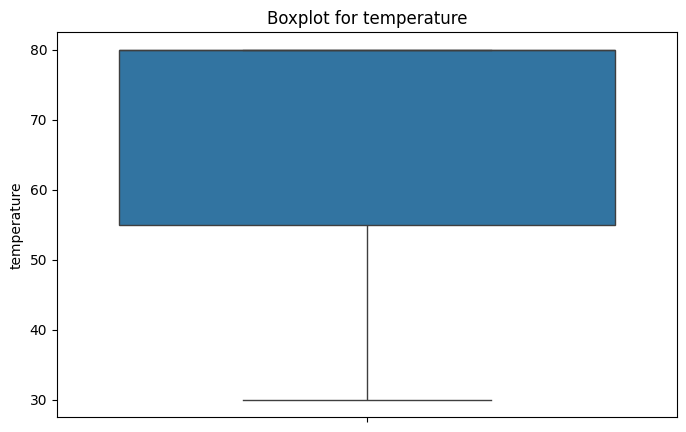

In [20]:
numerical_cols = ['temperature']
plot_boxplots(df, numerical_cols)

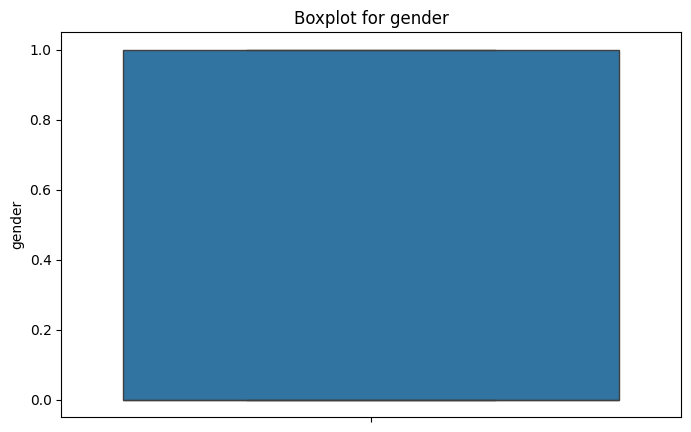

In [21]:
numerical_cols = ['gender']
plot_boxplots(df, numerical_cols)

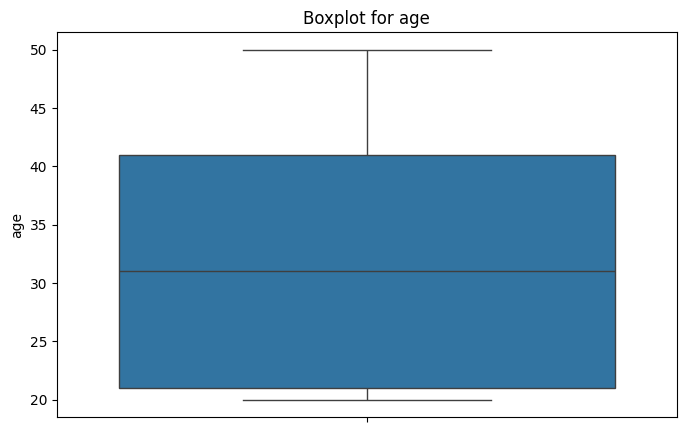

In [22]:
numerical_cols = ['age']
plot_boxplots(df, numerical_cols)

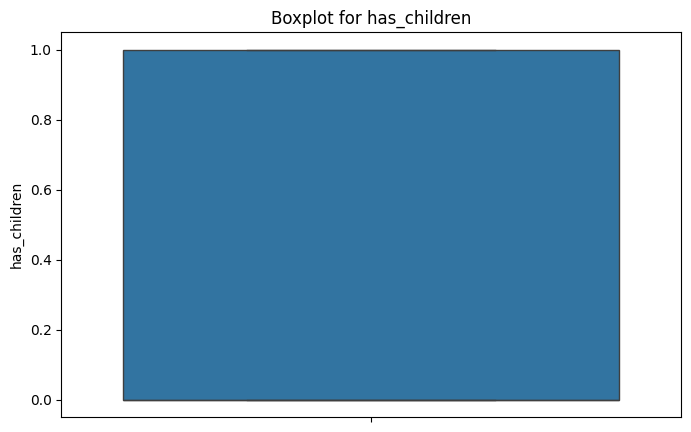

In [23]:
numerical_cols = ['has_children']
plot_boxplots(df, numerical_cols)

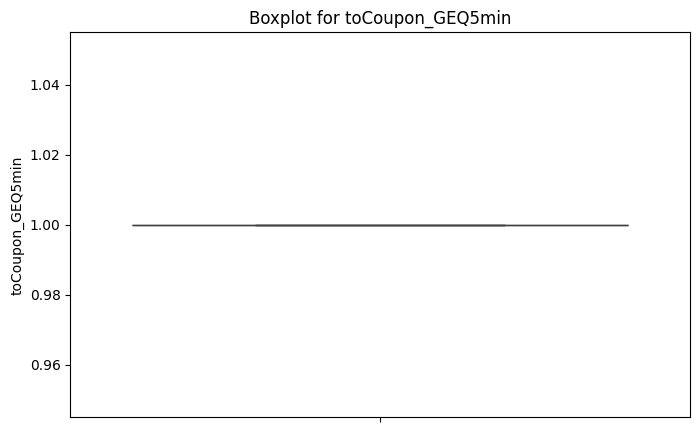

In [24]:
numerical_cols = ['toCoupon_GEQ5min']
plot_boxplots(df, numerical_cols)

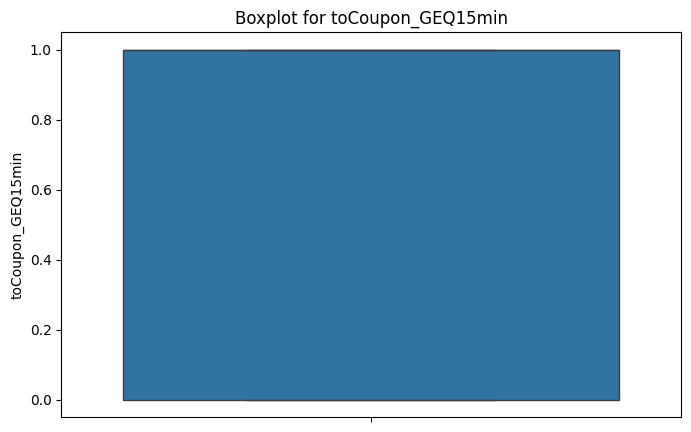

In [25]:
numerical_cols = ['toCoupon_GEQ15min']
plot_boxplots(df, numerical_cols)

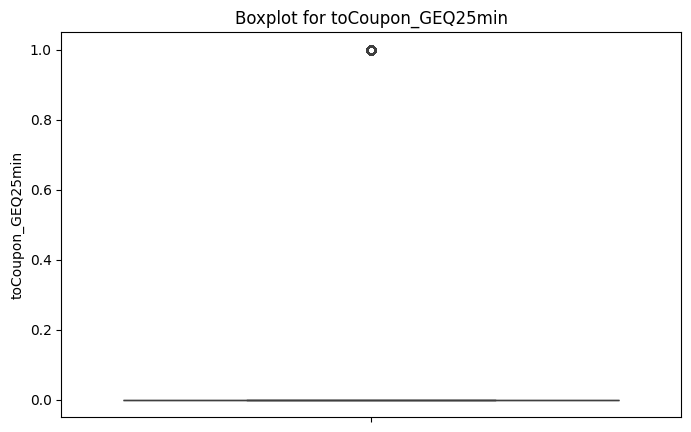

In [26]:
numerical_cols = ['toCoupon_GEQ25min']
plot_boxplots(df, numerical_cols)

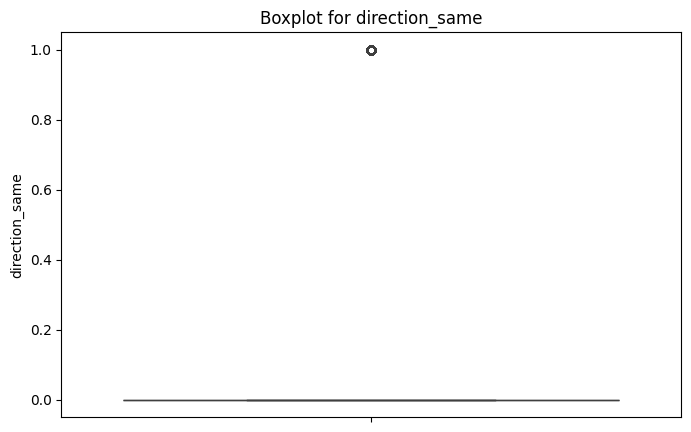

In [27]:
numerical_cols = ['direction_same']
plot_boxplots(df, numerical_cols)

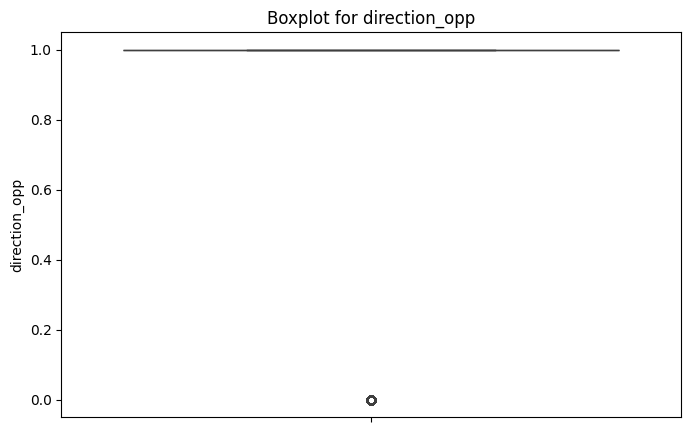

In [28]:
numerical_cols = ['direction_opp']
plot_boxplots(df, numerical_cols)

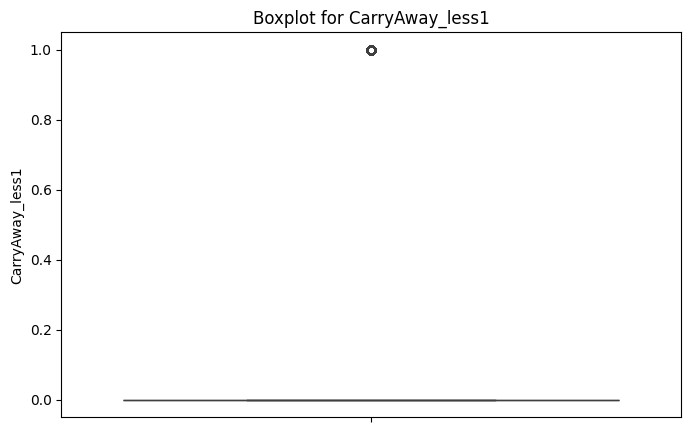

In [29]:
numerical_cols = ['CarryAway_less1']
plot_boxplots(df, numerical_cols)

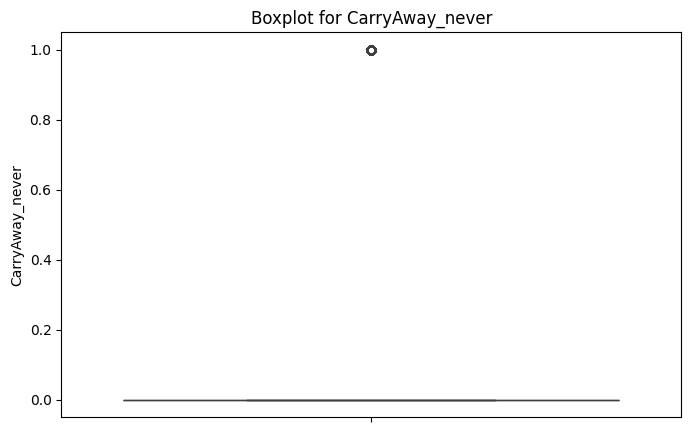

In [30]:
numerical_cols = ['CarryAway_never']
plot_boxplots(df, numerical_cols)

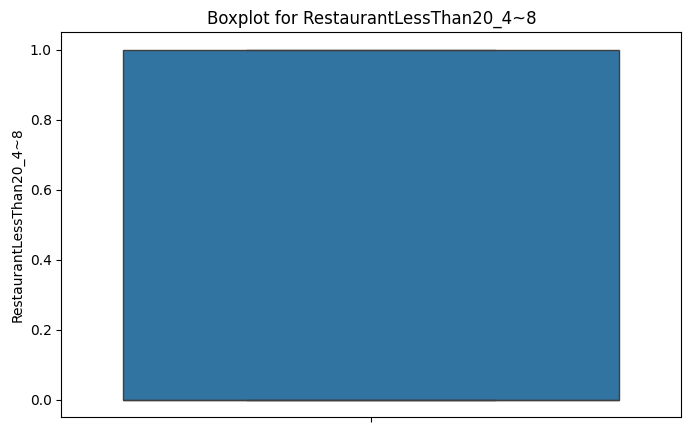

In [31]:
numerical_cols = ['RestaurantLessThan20_4~8']
plot_boxplots(df, numerical_cols)

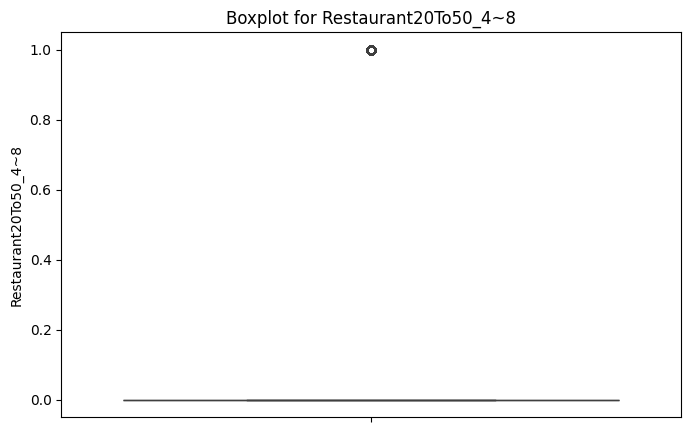

In [32]:
numerical_cols = ['Restaurant20To50_4~8']
plot_boxplots(df, numerical_cols)

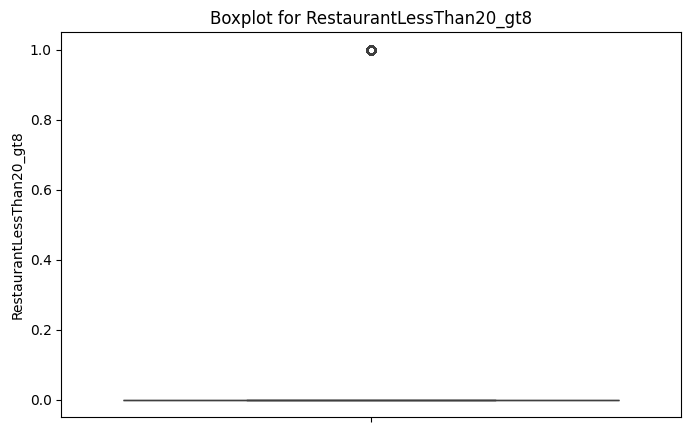

In [33]:
numerical_cols = ['RestaurantLessThan20_gt8']
plot_boxplots(df, numerical_cols)

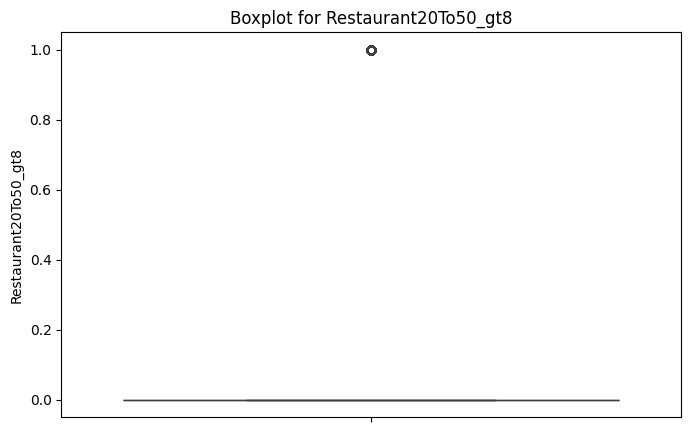

In [34]:
numerical_cols = ['Restaurant20To50_gt8']
plot_boxplots(df, numerical_cols)

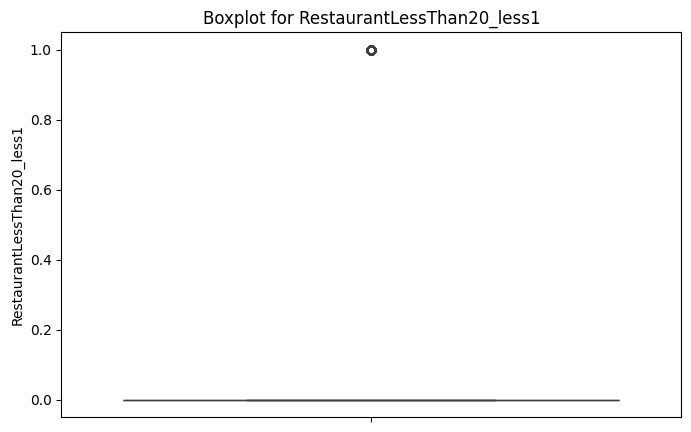

In [35]:
numerical_cols = ['RestaurantLessThan20_less1']
plot_boxplots(df, numerical_cols)

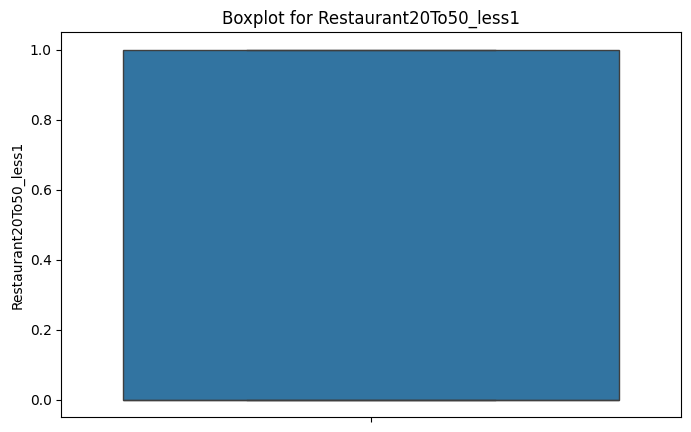

In [36]:
numerical_cols = ['Restaurant20To50_less1']
plot_boxplots(df, numerical_cols)

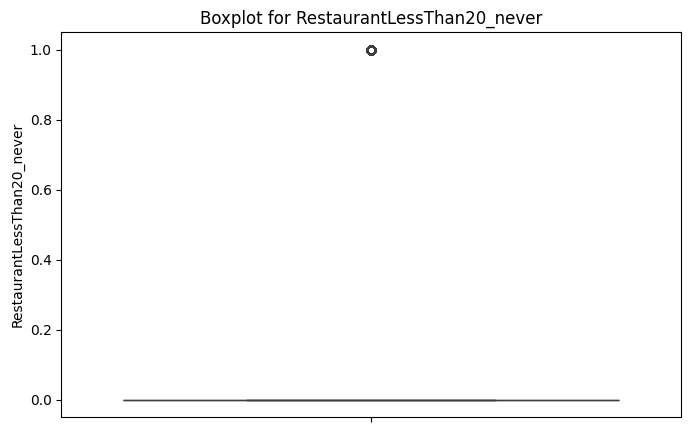

In [37]:
numerical_cols = ['RestaurantLessThan20_never']
plot_boxplots(df, numerical_cols)

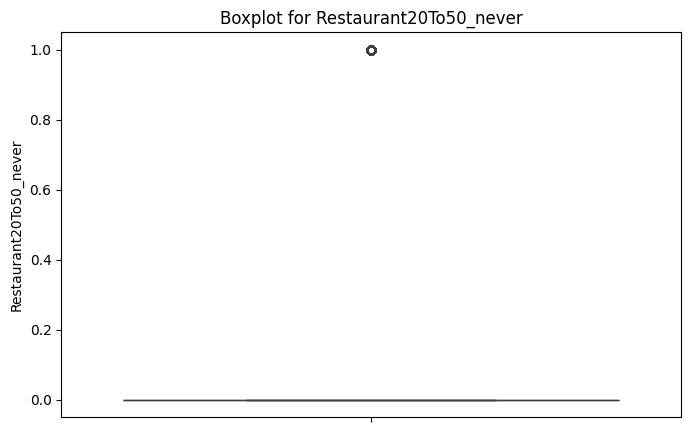

In [38]:
numerical_cols = ['Restaurant20To50_never']
plot_boxplots(df, numerical_cols)

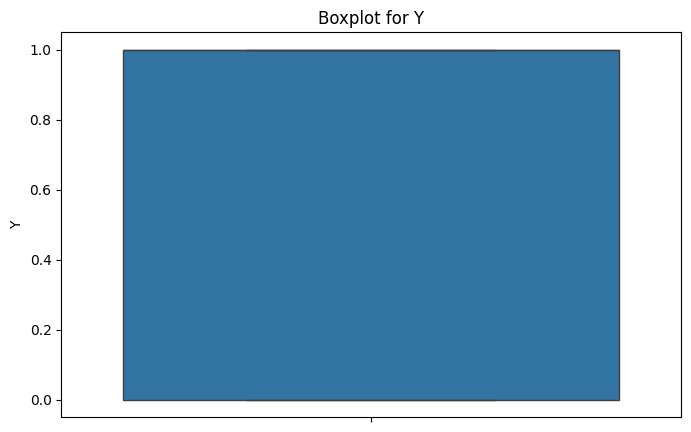

In [39]:
numerical_cols = ['Y']
plot_boxplots(df, numerical_cols)

In [40]:
# Detect and cap outliers using the IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [41]:
# Define acceptable range and cap outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for col in numerical_cols:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])


In [42]:
# Save cleaning results
print("Data Cleaning Completed!")

Data Cleaning Completed!


**6.EXPLORATORY DATA ANALYSIS(EDA)**

*i.histograms and KDE plots*

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>,
        <Axes: title={'center': 'toCoupon_GEQ15min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>,
        <Axes: title={'center': 'direction_opp'}>],
       [<Axes: title={'center': 'Y'}>, <Axes: >, <Axes: >]], dtype=object)

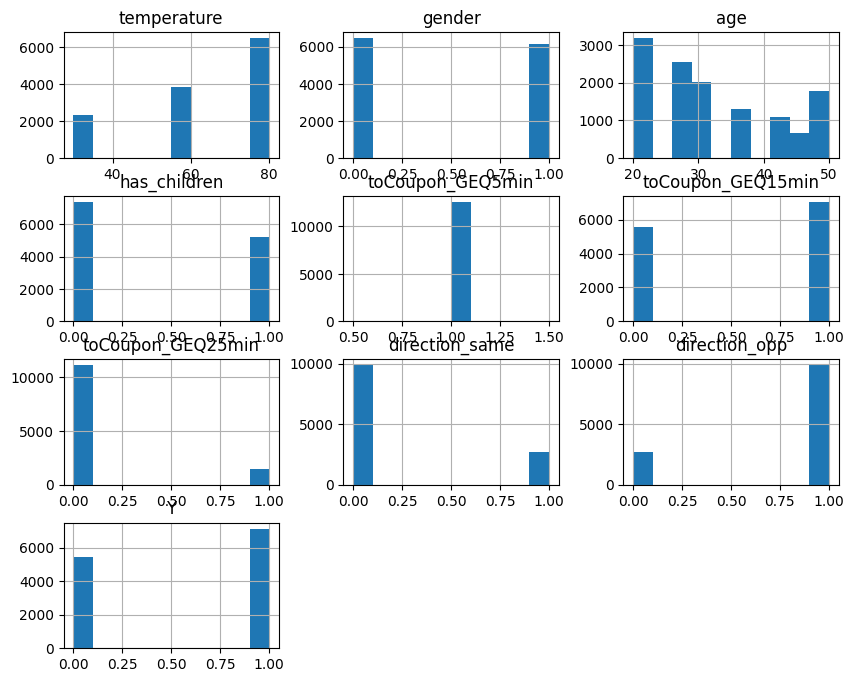

In [43]:
df.hist(figsize=(10,8))

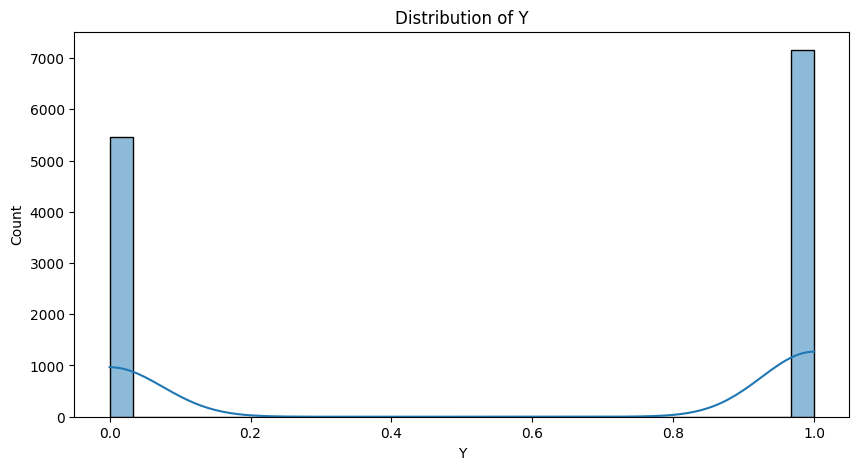

In [44]:
# Histograms and KDE plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

*ii.Correlation Heatmap*

In [45]:
#correlation heatmap
selected_cols = ['temperature', 'age', 'gender', 'has_children', 'toCoupon_GEQ5min',
                  'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
                  'direction_opp', 'Y']

In [46]:
correlation_matrix = df[selected_cols].corr()

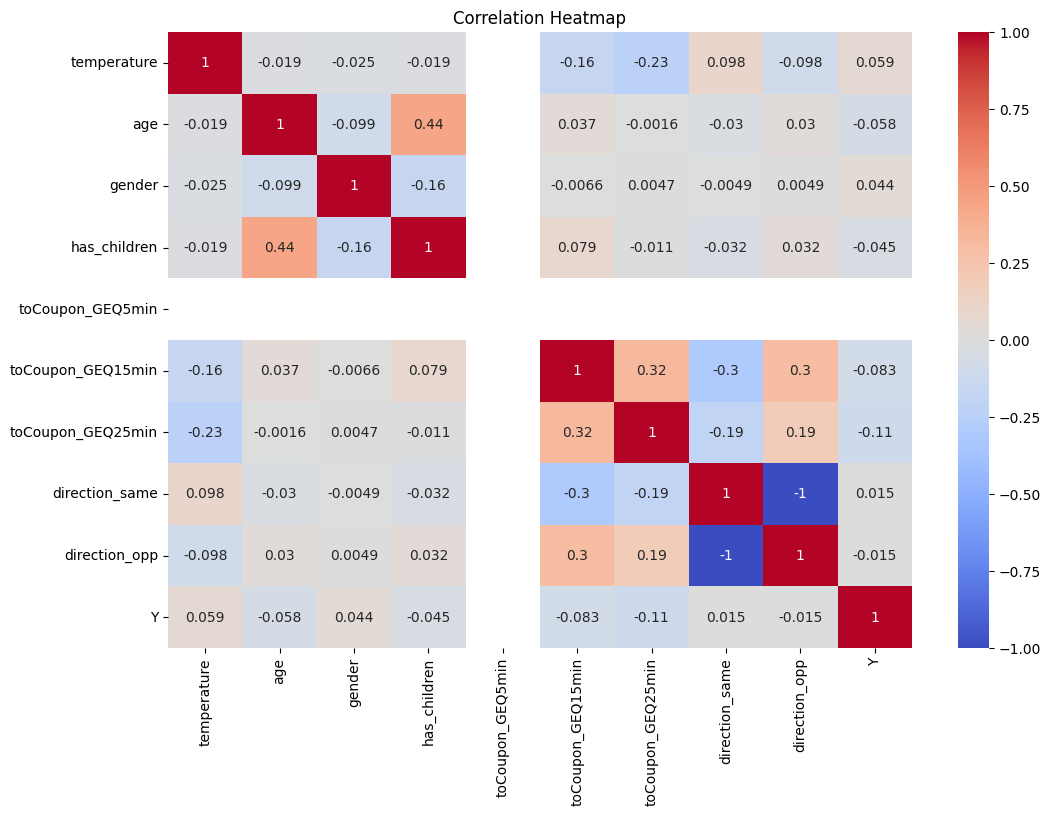

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*iii.Class Distribution*

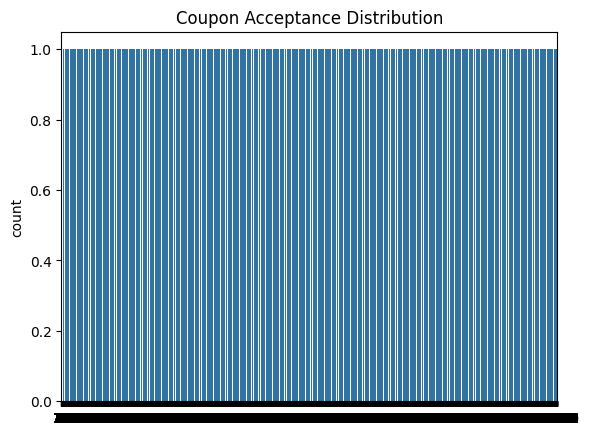

In [48]:
# Check class distribution
sns.countplot(df['Y'])
plt.title('Coupon Acceptance Distribution')
plt.show()

In [49]:
# Filter data: Age > 40 and income == 'Less than $12500'
filtered_df = df[(df['age'] > 40) & (df['income_Less than $12500'] == 1)]

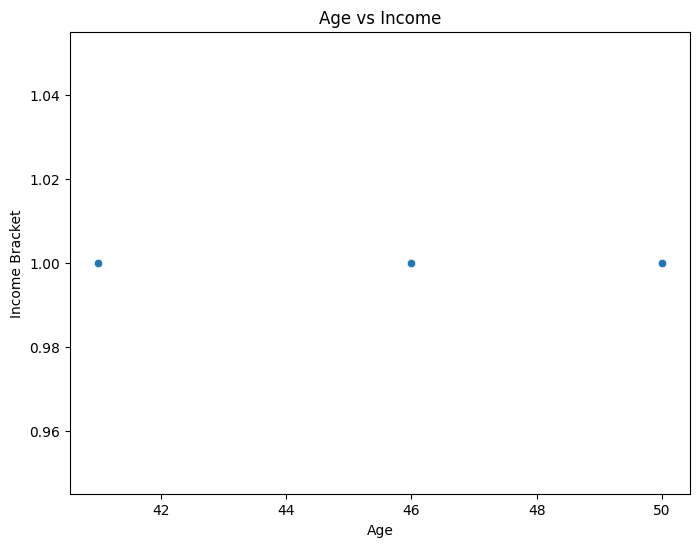

In [50]:
# Age vs Income (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='income_Less than $12500', data=filtered_df)
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income Bracket")
plt.show()


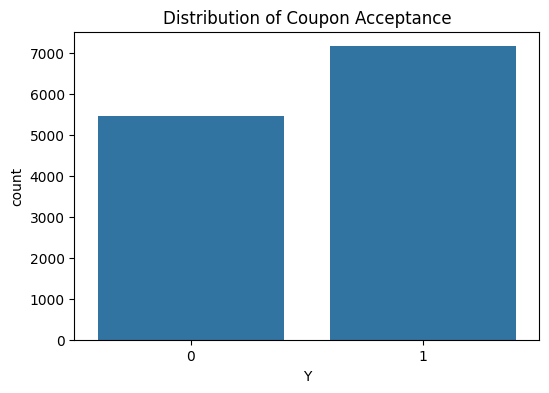

In [51]:
# Distribution of Y (Coupon Acceptance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title("Distribution of Coupon Acceptance")
plt.show()


**7.FEATURE ENGINEERING**

In [52]:
encoded_data = pd.get_dummies(df, drop_first=True)

In [53]:
X = df.drop(columns=['Y'])
y = df['Y']

In [54]:
print("Categorical Variables Encoded!")

Categorical Variables Encoded!


**8.FEATURE SELECTION**

*RANDOM FOREST CLASSIFIER*

In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [56]:
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Gender': [0, 1, 1, 0, 1],  # 0: Female, 1: Male
    'Experience': [1, 5, 10, 15, 20],
    'Target': [0, 1, 0, 1, 1]  # Target variable
}

In [57]:
df = pd.DataFrame(data)

In [58]:
# Feature columns and target column
X = df.drop(columns=['Target'])
y = df['Target']

In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Create and fit a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [61]:
# Get feature importances
importances = rf.feature_importances_

In [62]:
# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [63]:
# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [64]:
# Display feature importance
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
      Feature  Importance
1      Salary    0.387097
3  Experience    0.274194
0         Age    0.225806
2      Gender    0.112903


In [65]:
# Set a threshold for removing features
threshold = 0.05
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

In [66]:
# Filter the dataset to include only the important features
X_selected = X[important_features]

In [67]:
# Display the selected features
print("\nSelected Features after Removing Irrelevant/Redundant Features:")
print(X_selected)


Selected Features after Removing Irrelevant/Redundant Features:
   Salary  Experience  Age  Gender
0   50000           1   25       0
1   60000           5   30       1
2   70000          10   35       1
3   80000          15   40       0
4   90000          20   45       1


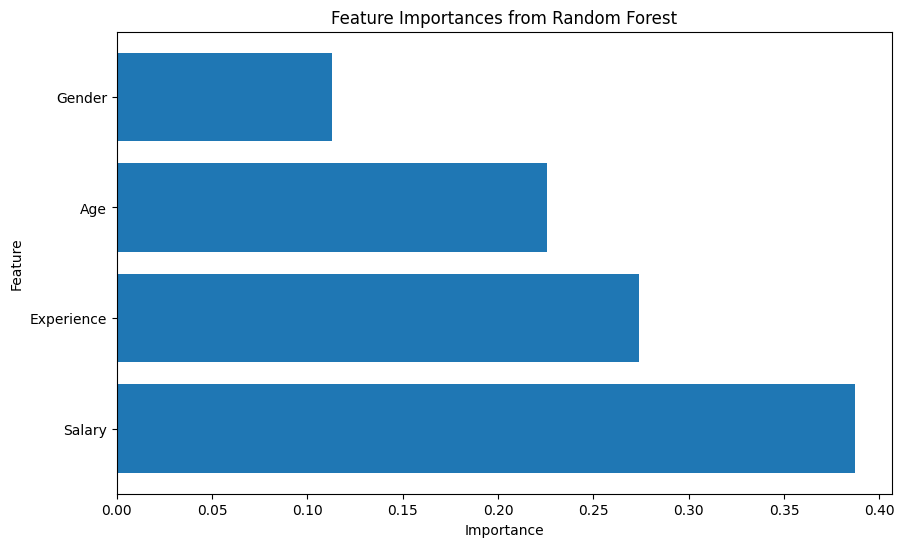

In [68]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()